<a href="https://colab.research.google.com/github/hvauchar/SAMHAR-COVID19-Hackathon/blob/master/augmentation_Kaggle_CNN_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/My Drive/covid19
# !pwd
# !ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/covid19
/content/gdrive/My Drive/covid19
 augmentation-Kaggle-CNN-COVID19.ipynb
 chest-xray-pneumonia.zip
 CNN-COVID19.ipynb
'Copy of Kaggle-CNN-COVID19.ipynb'
 DataAnalysis.ipynb
 heart-data-download.ipynb
 Kaggle-CNN-COVID19-TransferLearning.ipynb
 kaggle.ipynb
 models
 train


**Very Important Note this script will only work on High end devices beacuse Image Agumentation increases the size of the dataset by 6 times so either the code will crash or your device may run out off memory although this works when we reduce the number of augmantation methods still you need to wait too long for the script to complete**

In [0]:
import tensorflow as tf
print(tf.__version__)
import datetime
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, SeparableConv2D, BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import seaborn as sns
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

2.2.0-rc3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path_train = 'train/chest_xray/train/'
path_test = 'train/chest_xray/test/'
path_val = 'train/chest_xray/val/'

In [0]:
def ImgAugmentation(path):
  arr = []
  image = cv2.imread(path)
  image0 = cv2.resize(image,(IMG_SIZE,IMG_SIZE))/255.0
  image = tf.image.rgb_to_grayscale(image0)
  arr.append(image)
  flipped = tf.image.flip_left_right(image0)
  flipped = tf.image.rgb_to_grayscale(flipped)/255.0
  arr.append(flipped)
  rotate = tf.keras.preprocessing.image.random_rotation(image0, 90)
  rotate = tf.image.rgb_to_grayscale(rotate)
  arr.append(rotate)
  shift = tf.keras.preprocessing.image.random_shift(image0,0.3,0.4)
  shift = tf.image.rgb_to_grayscale(shift)/255.0
  arr.append(shift)
  rotated = tf.image.rot90(image0)
  rotated = tf.image.rgb_to_grayscale(rotated)/255.0
  arr.append(rotated)
  cropped = tf.image.central_crop(image0, central_fraction=0.7)
  cropped = tf.image.resize(cropped, (IMG_SIZE,IMG_SIZE))
  cropped = tf.image.rgb_to_grayscale(cropped)
  arr.append(cropped)
  return(arr)
def visualize_arr(arr):
  fig = plt.figure(figsize=(20,20))
  title = ['Original','flipped', 'rotate', 'Shift', '90 Rotated', 'zoomed']
  c = 1
  for i,j in zip(title, arr):
    plt.subplot(1,6,c)
    plt.title(i)
    plt.imshow(j[:,:,0])
    c += 1
  plt.show()

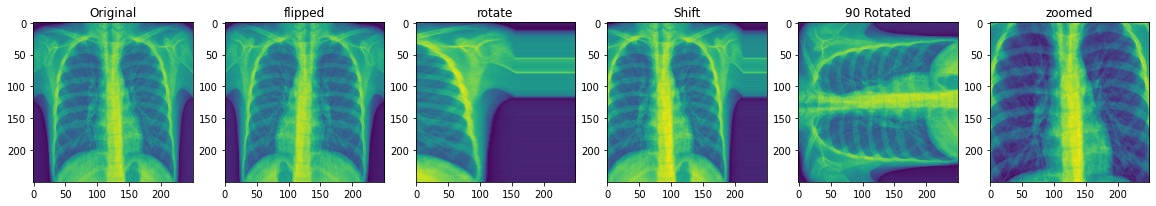

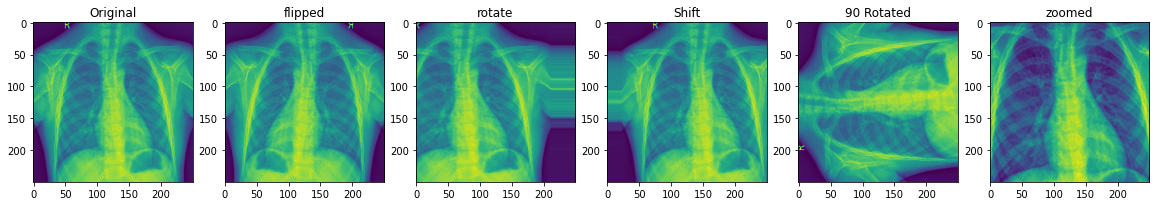

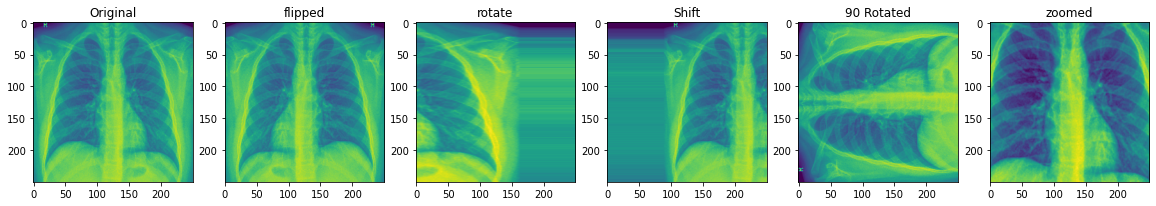

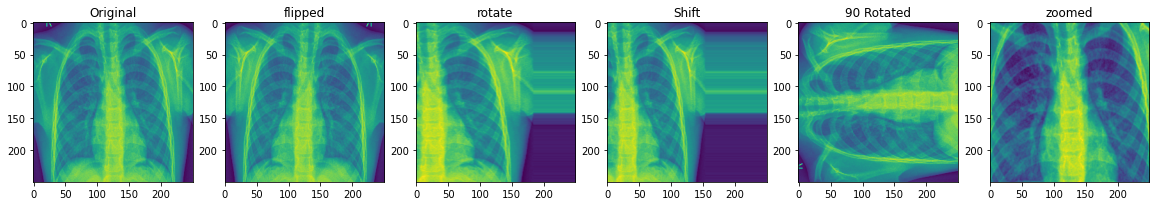

In [0]:
path = 'train/chest_xray/test/NORMAL/'
imgLs = os.listdir(path)[:4]
for ip in imgLs:
  arr = ImgAugmentation(path + ip)
  visualize_arr(arr)

In [0]:
CATEGORIES = ['NORMAL','PNEUMONIA']
IMG_SIZE=250
def create_training_data(dirlist):
  training_data=[]
  c = 0
  for DATADIR in dirlist:
    category0 = CATEGORIES[0]
    path = os.path.join(DATADIR,category0)
    class_num = CATEGORIES.index(category0)
    for img in os.listdir(path):
      try:
        pth1 = os.path.join(path,img)
        arr1 = ImgAugmentation(pth1)
        for i in arr1:
          training_data.append([i,class_num])
      except Exception as e:
        print(e)
    category1 = CATEGORIES[1]
    path = os.path.join(DATADIR,category1)
    class_num = CATEGORIES.index(category1)
    for img in os.listdir(path):
      if(c<=4047):
        try:
          pth2 = os.path.join(path,img)
          arr2 = ImgAugmentation(pth1)
          for i in arr2:
            training_data.append([i,class_num])
            c += 1
        except Exception as e:
          print(e)
      else:
        break
  random.shuffle(training_data)
  X=[]
  Y=[]
  for fetures, lable in training_data:
    X.append(fetures)
    Y.append(lable)
  X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
  print(collections.Counter(Y))
  return(X,np.array(Y).reshape(-1,1))

In [0]:
dirlist = [path_val ,path_train]
X_train,  y_train = create_training_data(dirlist)

The augmentation is only applicable on **Train Set** we will not perform augmentation on test set so we need to write a seperate function to generate images and lables of the test set without augmentation

In [0]:
CATEGORIES = ['NORMAL','PNEUMONIA']
IMG_SIZE=250
def create_testing_data(dirlist):
  training_data=[]
  c = 0
  for DATADIR in dirlist:
    category0 = CATEGORIES[0]
    path = os.path.join(DATADIR,category0)
    class_num = CATEGORIES.index(category0)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))/255.0
        training_data.append([new_array,class_num])
      except Exception as e:
        print(e)
    category1 = CATEGORIES[1]
    path = os.path.join(DATADIR,category1)
    class_num = CATEGORIES.index(category1)
    for img in os.listdir(path):
      if(c<=1583):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))/255.0
          training_data.append([new_array,class_num])
          c += 1
        except Exception as e:
          print(e)
  random.shuffle(training_data)
  X=[]
  Y=[]
  for fetures, lable in training_data:
    X.append(fetures)
    Y.append(lable)
  X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
  print(collections.Counter(Y))
  return(X,np.array(Y).reshape(-1,1))

In [0]:
dirlist = [path_test]
X_test,y_test = create_testing_data(dirlist)

In [0]:
for i in (X_train, X_test, y_train, y_test):
  print(i.shape)

(2216, 250, 250, 1)
(951, 250, 250, 1)
(2216, 1)
(951, 1)


In [0]:
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1),kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(64, 3, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(64, 3, activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(),
    
    SeparableConv2D(128, (3,3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    SeparableConv2D(128, (3,3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2,2)),
    
    SeparableConv2D(256, (3,3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    SeparableConv2D(256, (3,3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    SeparableConv2D(256, (3,3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2,2)),
    
    SeparableConv2D(512, (3,3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    SeparableConv2D(512, (3,3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    SeparableConv2D(512, (3,3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001))
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

In [0]:
history = model.fit(X_train,  y_train, epochs=5,validation_split=0.1)

Epoch 1/5
63/63 [==============================] - 40s 633ms/step - loss: 0.5933 - accuracy: 0.7713 - val_loss: 0.1699 - val_accuracy: 0.9459
Epoch 2/5
63/63 [==============================] - 39s 617ms/step - loss: 0.1780 - accuracy: 0.9363 - val_loss: 0.1602 - val_accuracy: 0.9505
Epoch 3/5
63/63 [==============================] - 39s 611ms/step - loss: 0.1748 - accuracy: 0.9413 - val_loss: 0.1776 - val_accuracy: 0.9414
Epoch 4/5
63/63 [==============================] - 39s 613ms/step - loss: 0.0923 - accuracy: 0.9679 - val_loss: 0.2251 - val_accuracy: 0.9279
Epoch 5/5
63/63 [==============================] - 39s 620ms/step - loss: 0.0909 - accuracy: 0.9679 - val_loss: 0.1795 - val_accuracy: 0.9279


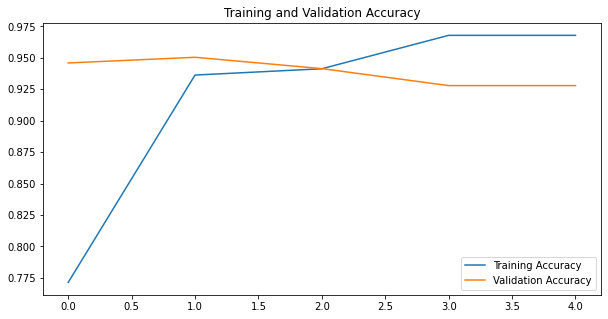

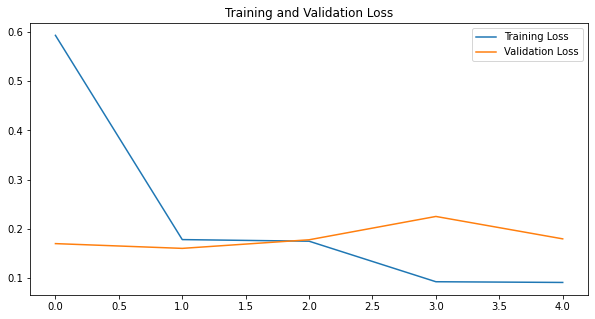

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(5)
plt.figure(figsize=(10,5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 2s 83ms/step - loss: 0.1387 - accuracy: 0.9506


[0.13871031999588013, 0.9505783319473267]

In [0]:
yhat = model.predict(X_test)
print(yhat.shape,y_test.shape)
yhat = yhat.flatten() 
y_test_reshaped = y_test.flatten() 
print(yhat.shape,y_test_reshaped.shape)

(951, 1) (951, 1)
(951,) (951,)


In [0]:
yhat = np.around(yhat, decimals=0).astype(int)

In [0]:
con_mat = tf.math.confusion_matrix(labels=y_test_reshaped, predictions=yhat).numpy()

In [0]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ['NORMAL','PNEUMONIA']
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

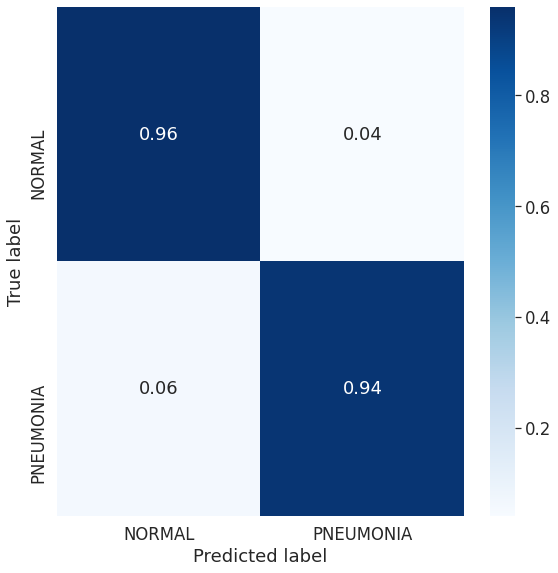

In [0]:
figure = plt.figure(figsize=(8, 8))
sns.set(font_scale=1.5)
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()